In [3]:
import pandas 
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
import numpy as np

In [3]:
df_ = pandas.read_csv("PlayTennis.csv")

In [4]:
df = pandas.read_csv("PlayTennis.csv")

In [5]:
X = df[df.columns[0:4]]
Y = df["Play Tennis"]

In [6]:
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [151]:
dtree = DecisionTreeClassifier(criterion='entropy',max_depth = 2)

In [152]:
from sklearn import preprocessing

In [153]:
encoder = preprocessing.LabelEncoder()

In [154]:

for x in range(0,5) :
    df[df.columns[x]] = encoder.fit_transform(df[df.columns[x]])

In [165]:
df

,Outlook,Temperature,Humidity,Wind,Play Tennis
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


In [56]:
y

array([0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [157]:
dtree.fit(X,Y)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [75]:
data = tree.export_graphviz(dtree, out_file=None, feature_names=["Outlook", "Temperature","Humidity","Wind"])

In [76]:
data

'digraph Tree {\nnode [shape=box] ;\n0 [label="Outlook <= 0.5\\nentropy = 0.94\\nsamples = 14\\nvalue = [5, 9]"] ;\n1 [label="entropy = 0.0\\nsamples = 4\\nvalue = [0, 4]"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="Humidity <= 0.5\\nentropy = 1.0\\nsamples = 10\\nvalue = [5, 5]"] ;\n0 -> 2 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n3 [label="entropy = 0.722\\nsamples = 5\\nvalue = [4, 1]"] ;\n2 -> 3 ;\n4 [label="entropy = 0.722\\nsamples = 5\\nvalue = [1, 4]"] ;\n2 -> 4 ;\n}'

In [62]:
!pip install pydotplus

  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24575 sha256=0f2538c3ae2ef2b875bab54ea47ddec94736d51f9b14dd5a1c457568b8058ce7
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\89\e5\de\6966007cf223872eedfbebbe0e074534e72e9128c8fd4b55eb
Successfully built pydotplus


In [15]:
import pydotplus
graph = pydotplus.graph_from_dot_data(data)

In [73]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Lenovo\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.13.0               |   py39haa95532_0         923 KB
    graphviz-2.38              |       hfd603c8_2        29.3 MB
    ------------------------------------------------------------
                                           Total:        30.2 MB

The following NEW packages will be INSTALLED:

  graphviz           pkgs/main/win-64::graphviz-2.38-hfd603c8_2

The following packages will be UPDATED:

  conda                               4.10.3-py39haa95532_0 --> 4.13.0-py39haa95532_0




graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   |            |   0% 
graphviz-2.38        | 29.3 MB   | 1          |   2% 
graphviz-2.38        | 29.3 MB   | 3

In [76]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz/bin/'

In [77]:
graph.write_png('mydecisiontree.png')


True

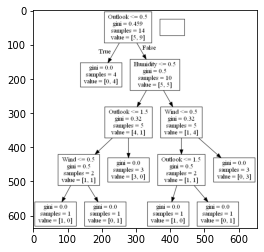

In [17]:
img=pltimg.imread('mydecisiontree.png')
imgplot = plt.imshow(img)
plt.show()



In [35]:
class GadId3Classifier:
  round = 0
  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)
    return self.tree

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def entropy(self, attribute_column):
    # find unique values and their frequency counts for the given attribute

    self.round= self.round+1
    values, counts = np.unique(attribute_column, return_counts=True)
    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      entropy_list.append(-probability*np.log2(probability))

    # calculate sum of individual entropy values
    total_entropy = np.sum(entropy_list)

    return total_entropy

  def information_gain(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given subset
    total_entropy = self.entropy(data[target_attribute_name])

    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_entropy_list = []
    problist = []
    sp = []
    for i in range(len(values)):
      print(counts[i])

      subset_probability = counts[i]/np.sum(counts)
      problist.append(subset_probability)
      subset_entropy = self.entropy(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_entropy_list.append(subset_probability*subset_entropy)
      sp.append(-subset_probability*np.log2(subset_probability))
    split_info = np.sum(sp)
    
    total_weighted_entropy = np.sum(weighted_entropy_list)
    

    # calculate information gain
    information_gain = total_entropy - total_weighted_entropy

    return information_gain/split_info

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.information_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return ig_values

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

In [36]:
model = GadId3Classifier()
tree = model.fit(X, Y)

4
5
5
4
4
6
7
7
6
8
2
3
2
3
2
3
1
2
2
3
2
2
3


In [84]:
tree

{'Outlook': {0: 1.0,
  1: {'Wind': {0.0: 0.0, 1.0: 1.0}},
  2: {'Humidity': {0.0: 0.0, 1.0: 1.0}}}}

In [69]:
dtree.best_error

AttributeError: 'DecisionTreeClassifier' object has no attribute 'best_error'

In [183]:
class GadId3Classifier_g:
  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)
    return self.tree

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def gini(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      entropy_list.append(probability*probability)

    # calculate sum of individual entropy values
    total_gini = 1 - np.sum(entropy_list)

    return total_gini

  def gini_gain(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given subset
    total_gini = self.gini(data[target_attribute_name])

    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_gini_list = []

    for i in range(len(values)):
      subset_probability = counts[i]/np.sum(counts)
      subset_entropy = self.gini(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_gini_list.append(subset_probability*subset_entropy)

    total_weighted_gini = np.sum(weighted_gini_list)

    # calculate information gain
    gini_gain = total_gini - total_weighted_gini

    return gini_gain

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.gini_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
      print(np.max(ig_values))
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return ig_values

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

In [184]:
model2 = GadId3Classifier_g()
tree2 = model2.fit(X, Y)

0.11632653061224485
0.48
0.48


In [185]:
tree2

[0.11632653061224485,
 0.018707482993197244,
 0.09183673469387743,
 0.030612244897959162]

In [118]:
!pip install chefboost

In [159]:
from chefboost import Chefboost as chef

In [167]:
config = {'algorithm': 'ID3'}
model = chef.fit(df, config = config, target_label = 'Play Tennis')

[INFO]:  4 CPU cores will be allocated in parallel running
ID3  tree is going to be built...
-------------------------
finished in  0.8584723472595215  seconds
-------------------------
Evaluate  train set
-------------------------
Accuracy:  100.0 % on  14  instances
Labels:  ['No' 'Yes']
Confusion matrix:  [[5, 0], [0, 9]]
Precision:  100.0 %, Recall:  100.0 %, F1:  100.0 %


In [161]:
model

{'trees': [<module 'outputs/rules/rules' from 'C:\\Users\\Lenovo\\Documents\\outputs/rules/rules.py'>],
 'alphas': [],
 'config': {'algorithm': 'ID3',
  'enableRandomForest': False,
  'num_of_trees': 5,
  'enableMultitasking': False,
  'enableGBM': False,
  'epochs': 10,
  'learning_rate': 1,
  'max_depth': 3,
  'enableAdaboost': False,
  'num_of_weak_classifier': 4,
  'enableParallelism': True,
  'num_cores': 4},
 'nan_values': []}

In [123]:
model.config

AttributeError: 'dict' object has no attribute 'config'

In [126]:
import matplotlib.pyplot as plt

In [139]:
gini_gain = [0.11632653061224485,
 0.018707482993197244,
 0.09183673469387743,
 0.030612244897959162]
info_gain = [0.24674981977443933,
 0.02922256565895487,
 0.15183550136234159,
 0.04812703040826949]

<BarContainer object of 4 artists>

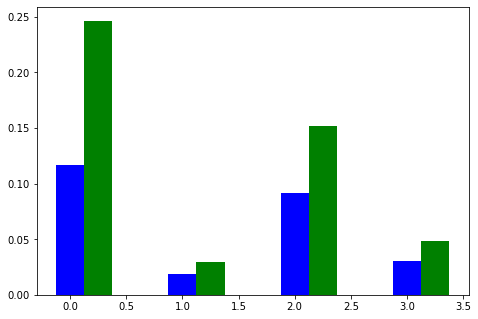

In [164]:
data = [gini_gain,info_gain,gain_ratio]
t = np.arange(4)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(t + 0.00, data[0], color = 'b', width = 0.25)
ax.bar(t + 0.25, data[1], color = 'g', width = 0.25)
#ax.bar(t + 0.25, data[2], color = 'y', width = 0.25)

In [186]:
class GadId3Classifier_gr:
  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)
    return self.tree

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def entropy(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      #print(probability)
      entropy_list.append(-probability*np.log2(probability))

    # calculate sum of individual entropy values
    total_entropy = np.sum(entropy_list)

    return total_entropy

  def information_gain(self, data, feature_attribute_name, target_attribute_name):
    print(data)
    # find total entropy of given subset
    total_entropy = self.entropy(data[target_attribute_name])

    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_entropy_list = []
    subset_probability = 0
    for i in range(len(values)):
      subset_probability = counts[i]/np.sum(counts)
      print(subset_probability);
      subset_entropy = self.entropy(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_entropy_list.append(subset_probability*subset_entropy)

    total_weighted_entropy = np.sum(weighted_entropy_list)

    # calculate information gain
    information_gain = total_entropy - total_weighted_entropy
    gain_ratio = information_gain/subset_probability

    return gain_ratio

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.information_gain(data, feature, target_attribute_name) for feature in feature_attribute_names]
      #print(ig_values)
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return tree

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

In [187]:
model3 = GadId3Classifier_gr()
tree3 = model3.fit(X, Y)

     Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Hot     High  Strong          No
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
5       Rain        Cool   Normal  Strong          No
6   Overcast        Cool   Normal  Strong         Yes
7      Sunny        Mild     High    Weak          No
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
13      Rain        Mild     High  Strong          No
0.2857142857142857
0.35714285714285715
0.35714285714285715
     Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Ho

In [61]:
tree3

{'Outlook': {'Overcast': 'Yes',
  'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}},
  'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}}

In [165]:
gain_ratio = [0.24674981977443933,
 0.02922256565895487,
 0.15183550136234159,
 0.04812703040826949]
ga = {"N1": gain_ratio[0],"N2": gain_ratio[1], "N3": gain_ratio[2], "N4" : gain_ratio[3]}
key = list(ga.keys())
value = list(ga.values())

AttributeError: 'tuple' object has no attribute 'show'

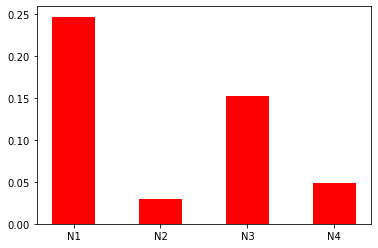

In [172]:
p1 = plt.bar(key,value, color = "green",width = 0.5)
p2 = plt.bar(key,value, color = "red",width = 0.5)
p3 = p1+p2 
p3.show()

In [85]:
data = pandas.read_csv('matches.csv')

In [93]:
data = data.drop(["runs","overs","rpo","Date"],axis = 1)

In [78]:
from sklearn import datasets
data = datasets.load_linnerud()

In [98]:
data = data.dropna()

In [142]:
data = data.iloc[0:20,:]

In [143]:
data

,team1,Inn,result,team2,Ground
0,Australia,1,lost,West Indies,Melbourne
2,Sri Lanka,1,lost,Australia,Sydney
6,New Zealand,1,won,Pakistan,Napier
7,Pakistan,2,lost,New Zealand,Napier
8,West Indies,1,won,Sri Lanka,Brisbane
9,Sri Lanka,2,lost,West Indies,Brisbane
10,Australia,1,lost,West Indies,Brisbane
11,West Indies,2,won,Australia,Brisbane
12,Pakistan,1,lost,New Zealand,Hamilton
13,New Zealand,2,won,Pakistan,Hamilton


In [136]:
y = data["team2"]
x = data[["team1","Inn","result","Ground"]]

In [137]:
x

,team1,Inn,result,Ground
0,Australia,1,lost,Melbourne
2,Sri Lanka,1,lost,Sydney
6,New Zealand,1,won,Napier
7,Pakistan,2,lost,Napier
8,West Indies,1,won,Brisbane
9,Sri Lanka,2,lost,Brisbane
10,Australia,1,lost,Brisbane
11,West Indies,2,won,Brisbane
12,Pakistan,1,lost,Hamilton
13,New Zealand,2,won,Hamilton


In [149]:
model4 = GadId3Classifier()
tree4 = model4.fit(x, y)

starting round #  0
values : ['Australia' 'England' 'India' 'New Zealand' 'Pakistan' 'Sri Lanka'
 'West Indies']
counts : [7 3 3 2 2 5 8]
starting round #  1
values : ['Sri Lanka' 'West Indies']
counts : [2 5]
starting round #  2
values : ['India']
counts : [3]
starting round #  3
values : ['England']
counts : [3]
starting round #  4
values : ['Pakistan']
counts : [2]
starting round #  5
values : ['New Zealand']
counts : [2]
starting round #  6
values : ['Australia' 'West Indies']
counts : [3 3]
starting round #  7
values : ['Australia' 'Sri Lanka']
counts : [4 3]
probality list [0.23333333333333334, 0.1, 0.1, 0.06666666666666667, 0.06666666666666667, 0.2, 0.23333333333333334]
starting round #  8
values : ['Australia' 'England' 'India' 'New Zealand' 'Pakistan' 'Sri Lanka'
 'West Indies']
counts : [7 3 3 2 2 5 8]
starting round #  9
values : ['Australia' 'England' 'India' 'New Zealand' 'Pakistan' 'Sri Lanka'
 'West Indies']
counts : [3 1 2 1 1 3 5]
starting round #  10
values : ['Austra

In [150]:
tree4

[1.98324590009608,
 0.033571733573644735,
 0.4914163166906311,
 1.2643193502804004]

In [13]:
import pydot

menu ={
    "persons": {
        "2": "unacc",
        "4": {
            "buying": {
                "high": {
                    "lug_boot": {
                        "big": {
                            "maint": {"high": "acc", "low": "acc", "vhigh": "unacc"}
                        },
                        "med": "unacc",
                        "small": "unacc",
                    }
                },
                "low": {
                    "doors": {
                        "3": {"maint": {"high": "acc", "low": "vgood", "vhigh": "acc"}},
                        "4": {"maint": {"high": "unacc", "low": "good"}},
                        "5more": {
                            "maint": {
                                "high": "vgood",
                                "low": "unacc",
                                "med": "unacc",
                                "vhigh": "unacc",
                            }
                        },
                    }
                },
                "med": {
                    "maint": {
                        "high": {
                            "lug_boot": {"big": "unacc", "med": "unacc", "small": "acc"}
                        },
                        "low": "unacc",
                        "med": "acc",
                        "vhigh": {
                            "doors": {
                                "2": "unacc",
                                "5more": {"lug_boot": {"big": "acc"}},
                            }
                        },
                    }
                },
                "vhigh": {
                    "maint": {
                        "high": "unacc",
                        "low": {
                            "lug_boot": {"big": "acc", "med": "unacc", "small": "unacc"}
                        },
                        "med": {"doors": {"3": "unacc", "5more": "acc"}},
                        "vhigh": "unacc",
                    }
                },
            }
        },
        "more": {
            "maint": {
                "high": {
                    "doors": {
                        "2": "unacc",
                        "3": "unacc",
                        "4": "unacc",
                        "5more": {"buying": {"low": {"lug_boot": {"med": "acc"}}}},
                    }
                },
                "low": {
                    "buying": {
                        "high": "unacc",
                        "low": "unacc",
                        "med": {
                            "lug_boot": {
                                "big": "good",
                                "med": {"doors": {"2": "unacc", "5more": "good"}},
                                "small": "unacc",
                            }
                        },
                        "vhigh": "acc",
                    }
                },
                "med": {
                    "lug_boot": {
                        "big": "acc",
                        "med": {
                            "doors": {
                                "2": {"buying": {"high": "unacc", "vhigh": "acc"}},
                                "3": "acc",
                                "5more": "acc",
                            }
                        },
                        "small": "unacc",
                    }
                },
                "vhigh": {"buying": {"high": "unacc", "low": "acc", "med": "unacc"}},
            }
        },
    }
}


def draw(parent_name, child_name):
    edge = pydot.Edge(parent_name, child_name)
    graph.add_edge(edge)

def visit(node, parent=None):
    for k,v in node.items():
        if isinstance(v, dict):
            # We start with the root node whose parent is None
            # we don't want to graph the None node
            if parent:
                draw(parent, k)
            visit(v, k)
        else:
            draw(parent, k)
            # drawing the label using a distinct name
            draw(k, k+'_'+v)

graph = pydot.Dot(graph_type='graph')
visit(menu)
graph.write_png('example1_graph.png')

In [14]:
graph


In [140]:
t


{'team1': {'Australia': {'result': {'lost': {'Ground': {'Adelaide': 'West Indies',
      'Brisbane': 'West Indies',
      'Melbourne': {'Inn': {1.0: 'West Indies', 2.0: 'West Indies'}},
      'Sydney': 'West Indies'}},
    'won': 'Sri Lanka'}},
  'England': 'India',
  'India': 'England',
  'New Zealand': 'Pakistan',
  'Pakistan': 'New Zealand',
  'Sri Lanka': {'Ground': {'Adelaide': 'West Indies',
    'Brisbane': 'West Indies',
    'Melbourne': 'Australia',
    'Sydney': {'Inn': {1.0: 'Australia', 2.0: 'West Indies'}}}},
  'West Indies': {'Inn': {1.0: {'Ground': {'Brisbane': 'Sri Lanka',
      'Melbourne': 'Australia',
      'Sydney': 'Sri Lanka'}},
    2.0: {'Ground': {'Adelaide': {'result': {'won': 'Australia'}},
      'Brisbane': 'Australia',
      'Sydney': 'Australia'}}}}}}

In [182]:
df.loc[df["Outlook"]=="Sunny"]
len(r)
len(r.loc[r["Play Tennis"]=="No"])

SyntaxError: invalid syntax (Temp/ipykernel_8648/2692390032.py, line 1)

In [195]:
test = GadId3Classifier_gr()
test.information_gain(df_,"Temperature","Play Tennis")

     Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Hot     High  Strong          No
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
5       Rain        Cool   Normal  Strong          No
6   Overcast        Cool   Normal  Strong         Yes
7      Sunny        Mild     High    Weak          No
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
13      Rain        Mild     High  Strong          No
0.2857142857142857
0.2857142857142857
0.42857142857142855


0.06818598653756136

In [197]:
tree = test.fit(X,Y)

     Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Hot     High  Strong          No
2   Overcast         Hot     High    Weak         Yes
3       Rain        Mild     High    Weak         Yes
4       Rain        Cool   Normal    Weak         Yes
5       Rain        Cool   Normal  Strong          No
6   Overcast        Cool   Normal  Strong         Yes
7      Sunny        Mild     High    Weak          No
8      Sunny        Cool   Normal    Weak         Yes
9       Rain        Mild   Normal    Weak         Yes
10     Sunny        Mild   Normal  Strong         Yes
11  Overcast        Mild     High  Strong         Yes
12  Overcast         Hot   Normal    Weak         Yes
13      Rain        Mild     High  Strong          No
0.2857142857142857
0.35714285714285715
0.35714285714285715
     Outlook Temperature Humidity    Wind Play Tennis
0      Sunny         Hot     High    Weak          No
1      Sunny         Ho

In [11]:
tree


<module 'sklearn.tree' from 'C:\\Users\\Lenovo\\anaconda3\\lib\\site-packages\\sklearn\\tree\\__init__.py'>

In [236]:
def treeinter(tree, currdepth, depth):
    if currdepth > depth :
        return currdepth
    currdepth = currdepth + 1
    for key , value in tree.items():
        if value == "Yes" :
            print(key)
        elif value == "No" :
            print(key)
            
        else :
            print(key)
            treeinter(tree[key],currdepth, depth)

In [240]:
treeinter(tree,0,3)

Outlook
Overcast
Rain
Wind
Strong
Weak
Sunny
Humidity
High
Normal


In [231]:
for key , value in tree.items():
        if value == "Yes" :
            print("end")
        elif value == "No" :
            print("end")
        else:
            print(tree[key])

{'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}}


In [214]:
tree.items()

dict_items([('Outlook', {'Overcast': 'Yes', 'Rain': {'Wind': {'Strong': 'No', 'Weak': 'Yes'}}, 'Sunny': {'Humidity': {'High': 'No', 'Normal': 'Yes'}}})])

In [8]:
class GadId3Classifier_e:
  list_ = []
  def getmetric(self) :
    return self.list_

  def fit(self, input, output):
    data = input.copy()
    data[output.name] = output
    self.tree = self.decision_tree(data, data, input.columns, output.name)
    return self.tree

  def predict(self, input):
    # convert input data into a dictionary of samples
    samples = input.to_dict(orient='records')
    predictions = []

    # make a prediction for every sample
    for sample in samples:
      predictions.append(self.make_prediction(sample, self.tree, 1.0))

    return predictions

  def missclassification_error(self, attribute_column):
    # find unique values and their frequency counts for the given attribute
    values, counts = np.unique(attribute_column, return_counts=True)

    # calculate entropy for each unique value
    entropy_list = []

    for i in range(len(values)):
      probability = counts[i]/np.sum(counts)
      #print(probability)
      entropy_list.append(probability)

    # calculate sum of individual entropy values
    merror = 1 - np.max(entropy_list)
    print("In merror : ", merror)

    return merror

  def gain_in_error(self, data, feature_attribute_name, target_attribute_name):
    # find total entropy of given subset
    total_error = self.missclassification_error(data[target_attribute_name])
    print("Total error in gain ", total_error)
    # find unique values and their frequency counts for the attribute to be split
    values, counts = np.unique(data[feature_attribute_name], return_counts=True)

    # calculate weighted entropy of subset
    weighted_error_list = []
    subset_probability = 0
    for i in range(len(values)):
      subset_probability = counts[i]/np.sum(counts)
      subset_error = self.missclassification_error(data.where(data[feature_attribute_name]==values[i]).dropna()[target_attribute_name])
      weighted_error_list.append(subset_probability*subset_error)

    total_weighted_error = np.sum(weighted_error_list)
    print("total error : ", total_weighted_error)

    # calculate information gain
    error_gain = total_error - total_weighted_error

    return error_gain

  def decision_tree(self, data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class=None):
    # base cases:
    # if data is pure, return the majority class of subset
    unique_classes = np.unique(data[target_attribute_name])
    if len(unique_classes) <= 1:
      return unique_classes[0]
    # if subset is empty, ie. no samples, return majority class of original data
    elif len(data) == 0:
      majority_class_index = np.argmax(np.unique(original_data[target_attribute_name], return_counts=True)[1])
      return np.unique(original_data[target_attribute_name])[majority_class_index]
    # if data set contains no features to train with, return parent node class
    elif len(feature_attribute_names) == 0:
      return parent_node_class
    # if none of the above are true, construct a branch:
    else:
      # determine parent node class of current branch
      majority_class_index = np.argmax(np.unique(data[target_attribute_name], return_counts=True)[1])
      parent_node_class = unique_classes[majority_class_index]

      # determine information gain values for each feature
      # choose feature which best splits the data, ie. highest value
      ig_values = [self.gain_in_error(data, feature, target_attribute_name) for feature in feature_attribute_names]
      self.list_.append(np.max(ig_values))
      best_feature_index = np.argmax(ig_values)
      best_feature = feature_attribute_names[best_feature_index]

      # create tree structure, empty at first
      tree = {best_feature: {}}

      # remove best feature from available features, it will become the parent node
      feature_attribute_names = [i for i in feature_attribute_names if i != best_feature]

      # create nodes under parent node
      parent_attribute_values = np.unique(data[best_feature])
      for value in parent_attribute_values:
        sub_data = data.where(data[best_feature] == value).dropna()

        # call the algorithm recursively
        subtree = self.decision_tree(sub_data, orginal_data, feature_attribute_names, target_attribute_name, parent_node_class)

        # add subtree to original tree
        tree[best_feature][value] = subtree

      return tree

  def make_prediction(self, sample, tree, default=1):
    # map sample data to tree
    for attribute in list(sample.keys()):
      # check if feature exists in tree
      if attribute in list(tree.keys()):
        try:
          result = tree[attribute][sample[attribute]]
        except:
          return default

        result = tree[attribute][sample[attribute]]

        # if more attributes exist within result, recursively find best result
        if isinstance(result, dict):
          return self.make_prediction(sample, result)
        else:
          return result

In [9]:
test = GadId3Classifier_e()
test.gain_in_error(df, "Outlook","Play Tennis")

In merror :  0.3571428571428571
Total error in gain  0.3571428571428571
In merror :  0.0
In merror :  0.4
In merror :  0.4
total error :  0.28571428571428575


0.07142857142857134

In [10]:
0/2

0.0

In [ ]:
len()